In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Intro to Linear Regression

**Task 1**: Read `weight-height.csv` as a pandas dataframe into the variable `df`. 

Hint: You want to use the function `pd.read_csv()`

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


**Task 2**: Create a scatterplot of the heights and weights of the dataframe with heights on the x-axis and weights on the y-axis. Feel free to use either `matplotlib` or `seaborn`.

In [31]:
df['Height']

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

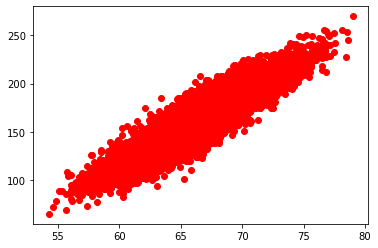

In [3]:
# Your code here
plt.scatter(x=df['Height'], y=df['Weight'], c='r')

Text(0.5, 1.0, 'Weight vs Height')

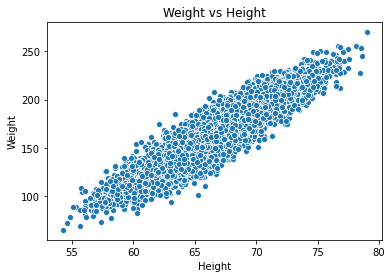

In [7]:
sns.scatterplot(df.Height, df.Weight)
plt.title('Weight vs Height')

**Task 3**: Implement the function `SSD`, which takes in two arrays and returns the sum squared distance between the two arrays. You may assume that `y` and `y_hat` are equal length.

$SSD(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y_i})^2$

$SSD(y, c) = \frac{1}{n}\sum_{i=1}^n (y_i - c)^2$

In [30]:
def SSD(y, y_hat):
    # Returns the sum squared distance between two arrays
    # y: Array of true labels
    # y_hat: Array of predicted labels
    n = len(y)
    return np.mean((y-y_hat)**2)

**Task 4**: Suppose we are trying to predict a person's weight based on their height with a constant number. Try several different constants, and print the `SSD` of each model. Which constant has the lowest `SSD`?

**Hint**: `np.ones(n)` will give you a numpy array of 1's of length n. How can you use this to get a numpy array of any constant of length c?

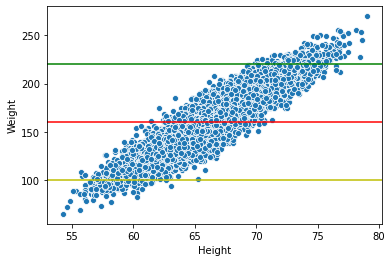

In [31]:
sns.scatterplot(df.Height, df.Weight)
plt.axhline(y=160, c='r')
plt.axhline(y=100, c='y')
plt.axhline(y=220, c='g')

Text(0.5, 1.0, 'Sum Squared Difference')

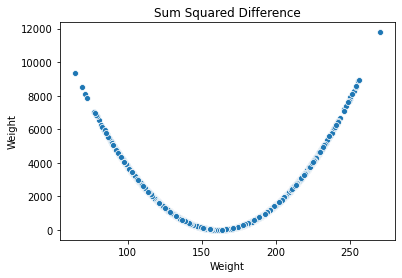

In [35]:
sns.scatterplot(df.Weight, (df.Weight - np.mean(df.Weight))**2)
plt.title('Sum Squared Difference')

In [34]:
# Your code here
predictions = np.ones(len(df.Weight)) * np.mean(df.Weight)
SSD(df.Weight, predictions)

1030.8487602498426

We will now try to model the height as a linear function of height. More specifically, we can predict weight as:

$$\hat{\text{weight}} = m \cdot \text{height} + b$$

where $m$ is the slope of the line, and $b$ is the intercept of the line. Our goal is to find the values of $m$ and $b$ that minimizes the SSD of our predictions. 

**Task 5**: Implement the linear_model function which takes in an array of values, `x`, and applies the linear transformation $y=mx+b$ for some values of m and b. Try a few different combinations of `m` and `b` and try to minimize the SSD of your predictions. Are your predictions better or worse than the constant model?

Text(0, 0.5, 'Predicted Weight')

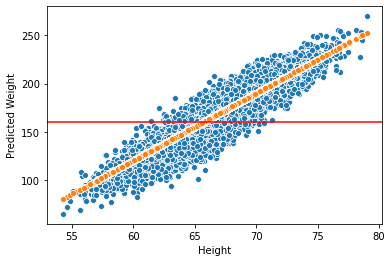

In [50]:
sns.scatterplot(df.Height, df.Weight)
plt.axhline(y=160, c='r')

m = 7
b = -300

sns.scatterplot(df.Height, m*df.Height + b)

plt.xlabel('Height')
plt.ylabel('Predicted Weight')

In [51]:
def linear_model(x, m, b):
    # Applies a linear transformation to an array of values
    # x: Array of input values
    # m: slope of line
    # b: intercept of line
    return m*x + b

**Task 6 (optional):** We will now find the optimal values of `m` and `b` using a machine learning library, `scikit-learn`. For now, don't worry about too much about how these values are found. We will cover the math later.

$$y = \beta_1x_1 + \beta_2x_2 + \beta_0$$

$$\hat{weight} = m_1(height) + m_2(age) + b$$

In [52]:
from sklearn.linear_model import LinearRegression

In [58]:
LR = LinearRegression(fit_intercept=True)
LR.fit(X=df.Height.to_numpy().reshape(-1, 1), y=df.Weight)

# SSD(..., ...)

LinearRegression()

In [61]:
LR.coef_, LR.intercept_

(array([7.71728764]), -350.7371918121373)

Text(0, 0.5, 'Predicted Weight')

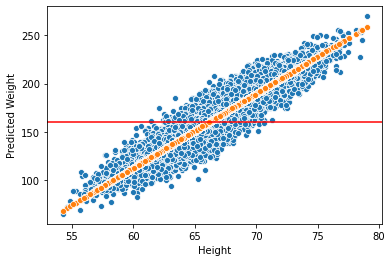

In [62]:
sns.scatterplot(df.Height, df.Weight)
plt.axhline(y=160, c='r')

m = LR.coef_[0]
b = LR.intercept_

sns.scatterplot(df.Height, m*df.Height + b)

plt.xlabel('Height')
plt.ylabel('Predicted Weight')

## Introduction to Machine Learning

From [Wikipedia](https://en.wikipedia.org/wiki/Machine_learning): Machine learning (ML) is the study of computer algorithms that improve automatically through experience and by the use of data.[1] It is seen as a part of artificial intelligence. Machine learning algorithms build a model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.[2] Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks.

![](modeling.png)

### Training Data and Test Data

![](split.png)

### Making your Predictions

### Evaluating Your Predictions (Loss Functions)

**Squared Loss (L2)**

\begin{align}
L(y, \hat{y}) &= \sum_{i=1}^n (y_i - \hat{y_i})^2 \\
&= \sum_{i=1}^n (y_i - (\hat{m}x_i + \hat{b}))^2
\end{align}

**Absolute Loss (L1)**
\begin{align}
L(y, \hat{y}) &= \sum_{i=1}^n |y_i - \hat{y_i}| \\
&= \sum_{i=1}^n |y_i - (\hat{m}x_i + \hat{b})|
\end{align}

**Task 7**: Import the `world-happiness-report.csv` dataset and build a linear model using the techniques above. Next week, you will have the chance to polish the model and submit it to [Kaggle](https://kaggle.com).